<a href="https://colab.research.google.com/github/pen1064/Practice/blob/main/pytorch_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import torch 
import math
from matplotlib import pyplot as plt

In [4]:
device = torch.device('cpu')

y_pred = a + b * x + c * x ** 2 + d * x ** 3

In [76]:
def calculate_loss(y_pred, y):
  return ((y_pred-y)**2).sum()

In [77]:
def forward_propagation(a, b, c, d, x):
  y_pred = a + b*x + c*x**2 + d*x**3
  return y_pred


In [78]:
def backward_propagation(x, y, y_pred, a, b, c, d, lr):
  dldy = 2*(y_pred-y)
  dyda = 1
  dydb = x
  dydc = x**2
  dydd = x**3

  grad_a = (dldy*dyda).sum()
  grad_b = (dldy*dydb).sum()
  grad_c = (dldy*dydc).sum()
  grad_d = (dldy*dydd).sum()

  a -= lr*grad_a
  b -= lr*grad_b
  c -= lr*grad_c
  d -= lr*grad_d
  return a, b, c, d

In [80]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float)
y = torch.sin(x)
a = torch.randn((), device=device, dtype=torch.float)
b = torch.randn((), device=device, dtype=torch.float)
c = torch.randn((), device=device, dtype=torch.float)
d = torch.randn((), device=device, dtype=torch.float)
lr = 1e-6
loss = []
for i in range(2000):
  y_pred = forward_propagation(a, b, c, d, x)
  loss.append(calculate_loss(y_pred, y))
  a,b,c,d = backward_propagation(x, y, y_pred, a, b, c, d, lr)

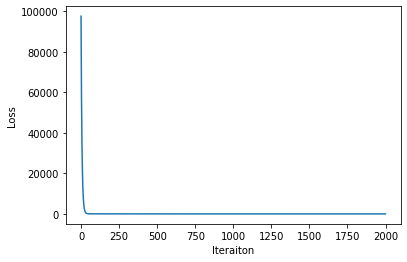

In [86]:
plt.plot(range(len(loss)), loss)
plt.xlabel('Iteraiton')
plt.ylabel('Loss')
plt.show()